In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
iris=load_iris(as_frame=True)
data=iris.frame.copy()
print(data)
x=data.drop(columns='target')
y=data['target']
##if binary classification then
##y=(data['target]==0 or 1 or 2).astype(int)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [17]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)   
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[0.1,1.0,10,100]
solver=['newton-cg','lbfgs']
params=dict(penalty=penalty,C=c_values,solver=solver)
##Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=6)
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)


c:\Users\SRIHARSHITH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SRIHARSHITH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [27]:
grid.best_estimator_
grid.best_params_
grid.best_score_



0.9531590413943355

In [ ]:
y_pred=grid.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix\n",confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

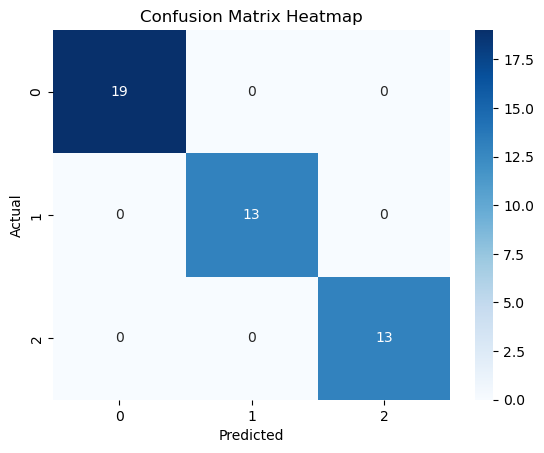

In [ ]:
sns.heatmap(confusion_matrix,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

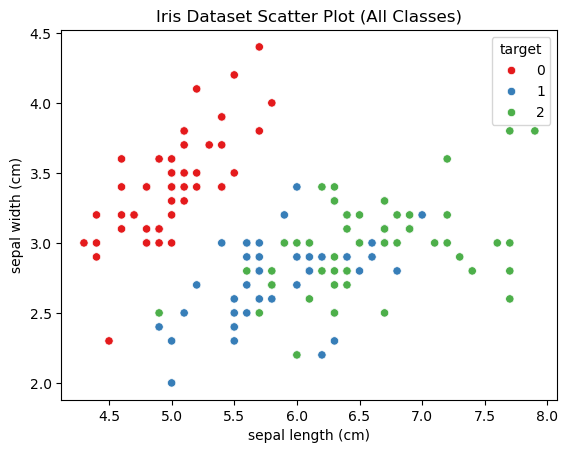

In [ ]:
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='target',   # colors by species
    palette='Set1',
    data=data
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset Scatter Plot (All Classes)')
plt.show()